# EDA on Titanic dataset

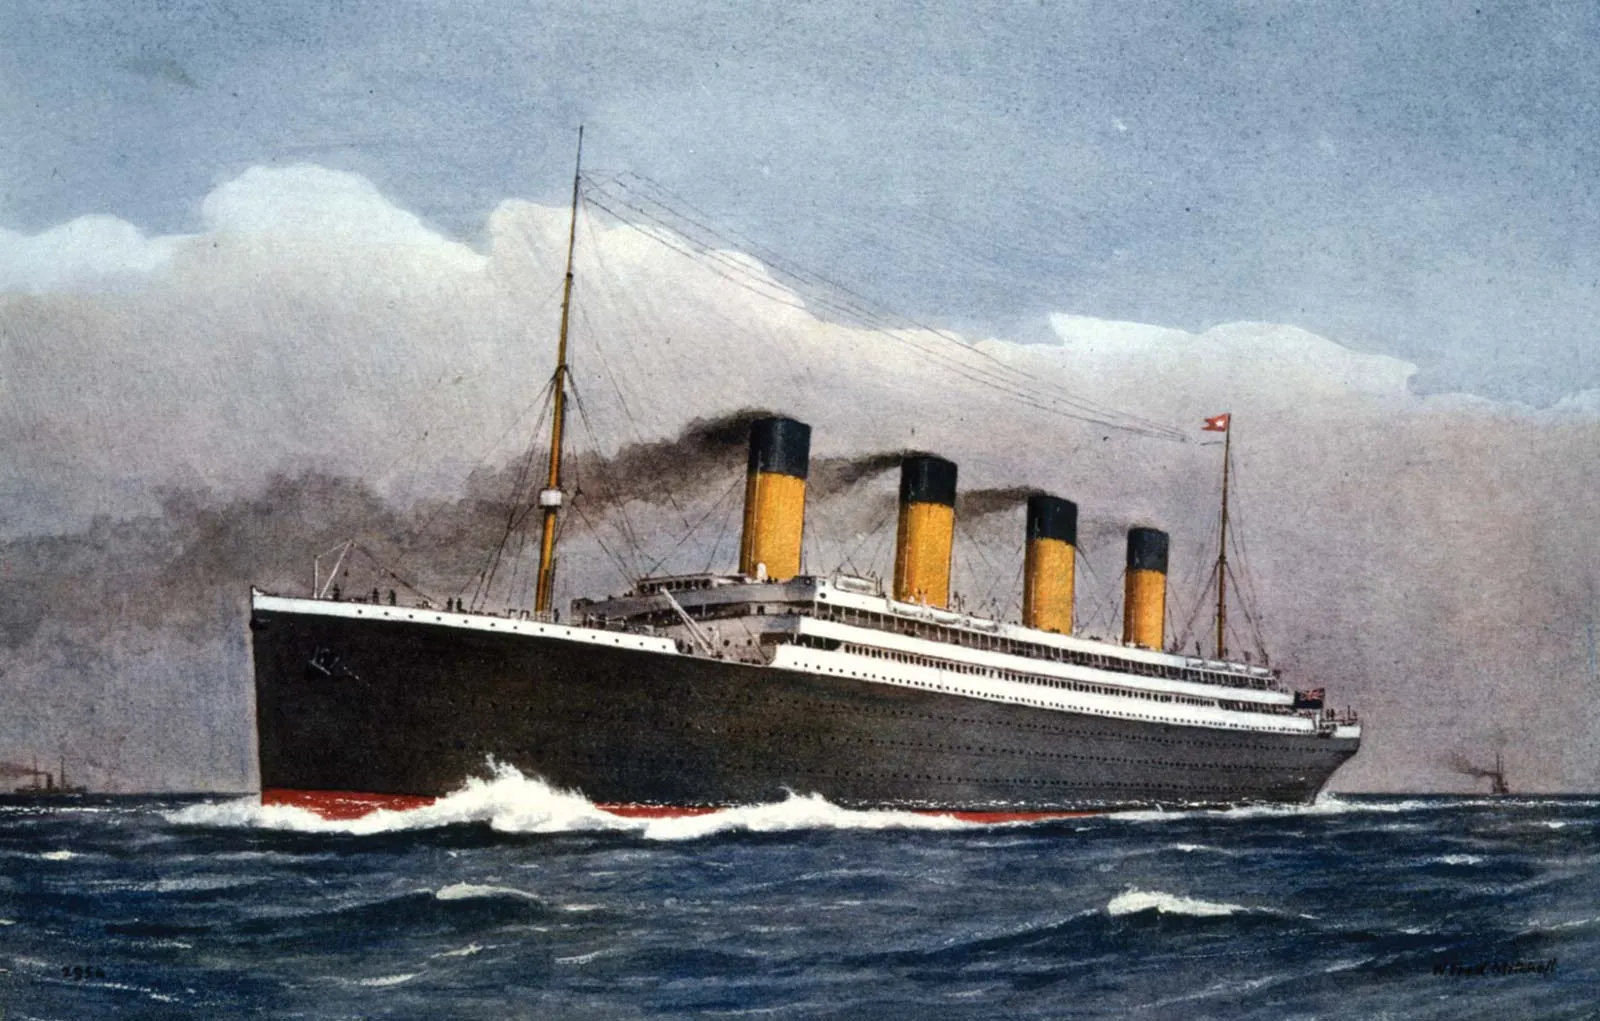

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape # Attribute

(891, 12)

In [4]:
df.columns # Attribute

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.Survived.unique()

array([0, 1])

In [7]:
df['Survived'].unique()

array([0, 1])

In [8]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [10]:
cat_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
cat_cols

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [14]:
for col in cat_cols:
    print(df[col].value_counts())
    print("."*70) # String Repetition
    print(df[col].value_counts(normalize=True)*100)
    print("="*70) # String Repetition

Survived
0    549
1    342
Name: count, dtype: int64
......................................................................
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
......................................................................
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64
Sex
male      577
female    314
Name: count, dtype: int64
......................................................................
Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
......................................................................
SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: proportion, dtype: float64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Nam

In [17]:
# Missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# Missing values
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [20]:
!pip install ydata_profiling -q

In [22]:
from pathlib import Path

In [23]:
from ydata_profiling import ProfileReport
from pathlib import Path
profile = ProfileReport(
        df, title="Profile Report of the Titanic Dataset", explorative=True
    )
profile.to_file(Path("preprofile_report.html"))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.11/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'S'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
# Missing values
df.isna().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [26]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [30]:
s = pd.Series([10,20,30])
print(s)
print(type(s))
print(s[0])

0    10
1    20
2    30
dtype: int64
<class 'pandas.core.series.Series'>
10


In [31]:
df.Embarked.mode()[0]

'S'

In [32]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

In [33]:
# Missing values
df.isna().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [34]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [37]:
%matplotlib inline

In [39]:
import warnings
warnings.filterwarnings("ignore")

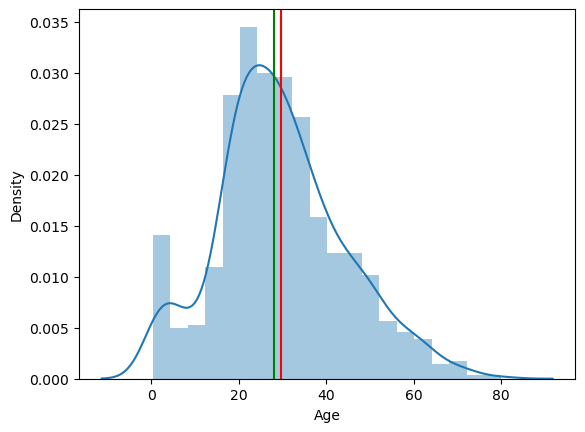

In [41]:
sns.distplot(df.Age)
plt.axvline(df.Age.mean(), color='red')
plt.axvline(df.Age.median(), color='green')
plt.show()

In [42]:
df.Age.skew()

0.38910778230082704

In [43]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [44]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [45]:
from ydata_profiling import ProfileReport
from pathlib import Path
profile = ProfileReport(
        df, title="Post Profile Report of the Titanic Dataset", explorative=True
    )
profile.to_file(Path("postprofile_report.html"))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Engineering

It is a process of engineering new meaningful features from the currently existing ones.

**Lets engineer two features:**

>1. FamilySize: SibSp + Parch + 1

>2. GenderClass: If Age<15, then child; else Sex.

In [46]:
df['FamilySize'] = df['SibSp'] + df.Parch + 1

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [48]:
df.groupby(['Sex'])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

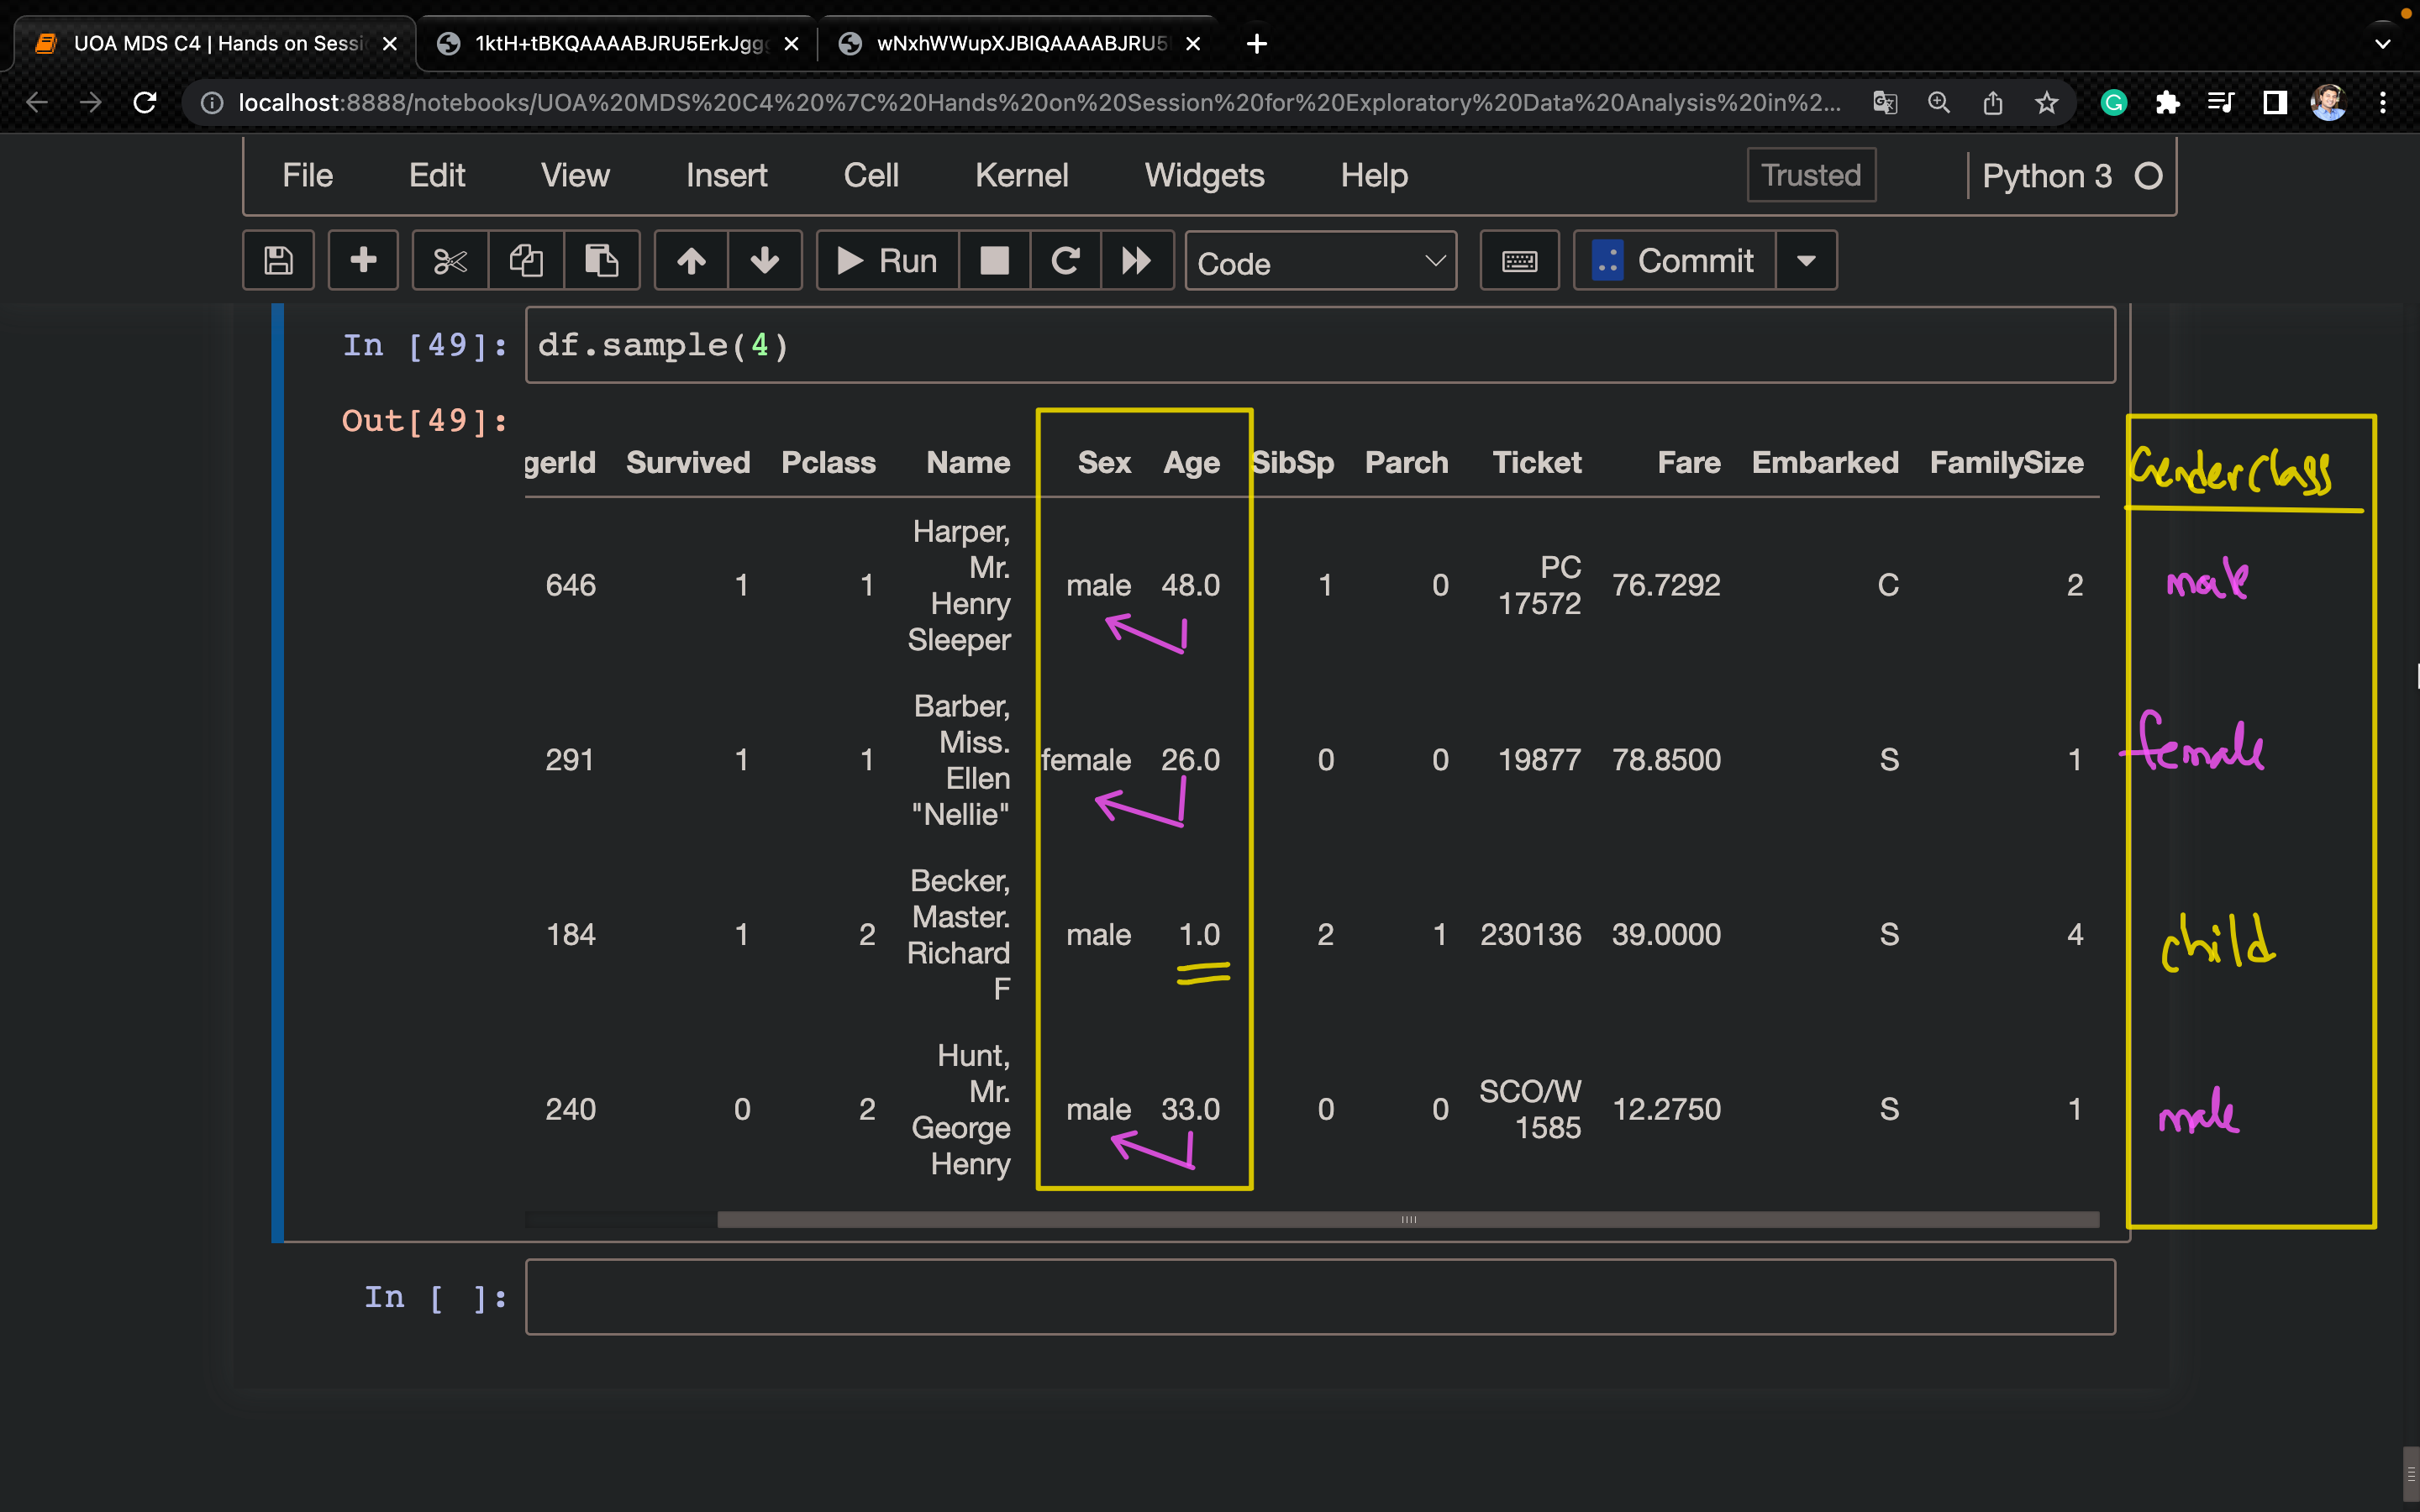

In [49]:
df["GenderClass"] = df.apply(lambda x : "child" if x['Age']<15 else x['Sex'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [50]:
df.groupby(['GenderClass'])["Survived"].mean()

GenderClass
child     0.576923
female    0.760000
male      0.163569
Name: Survived, dtype: float64

In [52]:
df.groupby(['Pclass','GenderClass'])[['Survived']].mean().unstack()

Survived                    
GenderClass     child    female      male
Pclass                                   
1            0.800000  0.978261  0.352941
2            1.000000  0.909091  0.080808
3            0.407407  0.504274  0.118750

# Happy Learning